In [2]:
import pandas as pd

# Replace 'path/to/your/file.tsv' with the actual path to your TSV file
df = pd.read_csv('../2022_06_13_ATLAS_info.tsv', delimiter='\t')
# Now you can work with your DataFrame 'df'


In [1]:
import mdtraj as md

# Open the XTC trajectory file
u = md.load("../16pk_A_analysis/16pk_A_R1.xtc", top= "../16pk_A_analysis/16pk_A.pdb")

In [11]:
md.compute_rg(u[0])

array([2.32501707])

In [2]:
residues = [residue.name for residue in u.top.residues]
amino_acid_to_index = {amino_acid: i for i, amino_acid in enumerate(set(residues))}

In [3]:
indices = [amino_acid_to_index[aa] for aa in residues]

In [4]:
import numpy as np
feats = []
for i in range(len(indices)):
    arr = np.zeros(20)
    arr[indices[i]] = 1
    feats.append(arr)
    

In [6]:
import torch
feats = torch.tensor(feats, dtype=torch.float)

/tmp/ipykernel_3793136/1253096098.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  feats = torch.tensor(feats, dtype=torch.float)


In [7]:
feats.shape

torch.Size([415, 20])

# Visualization of latent space

In [9]:
import pickle as pk
import phate
import matplotlib.pyplot as plt
with open('../test_latent.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_rep = pk.load(file)

with open('../times.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times = pk.load(file)

In [10]:
times.shape

(800,)

Calculating PHATE...
  Running PHATE on 800 observations and 128 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.03 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.09 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.13 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 0.58 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.53 seconds.
Calculated PHATE in 1.37 seconds.


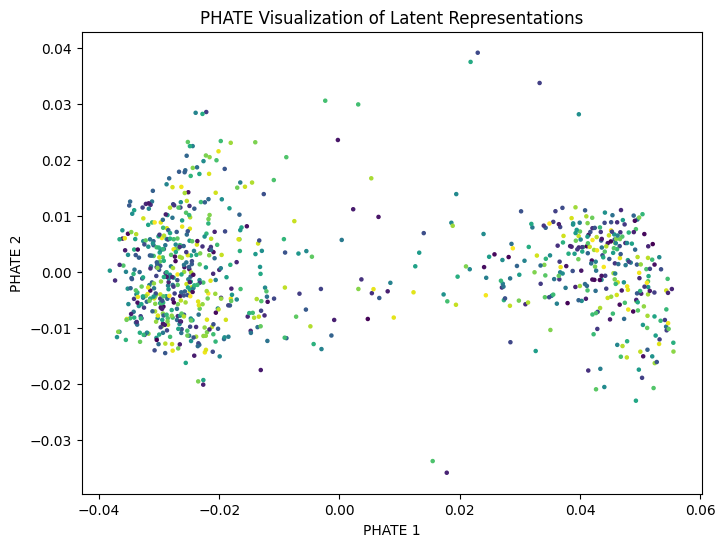

In [11]:
# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(z_rep)

# Visualize the latent representation
plt.figure(figsize=(8, 6))
plt.scatter(z_phate[:, 0], z_phate[:, 1], s=5, c=times, cmap='viridis')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('PHATE Visualization of Latent Representations')
plt.show()
